In [3]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [103]:
# Loading the data from package
#DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
#counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv_v2.csv"), index_col=0)
#counts_df = counts_df.T
#metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_v2.csv"), index_col=0)

In [123]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/data/replicates"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "10_rna_join_40_3000.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "10_metadata_40_3000.csv"), index_col=0)

In [9]:
#Data filtering
#genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
#counts_df = counts_df[genes_to_keep]
counts_df.shape

(20, 1000)

In [125]:
inference = DefaultInference(n_cpus=8)

dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=True,
    inference=inference,
)

dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

# Statistical analysis
stat_res = DeseqStats(dds, 
                      alpha=0.05, 
                      cooks_filter=True, 
                      independent_filter=True)

stat_res.run_wald_test()

if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values

# p-value adjustment

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

stat_res.summary()

stat_res.lfc_shrink(coeff="condition_B_vs_A")

#Save results
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/results/replicates_pydeseq/cn_naive/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "10_res_CNnaive_40_3000.csv"))

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.36 seconds.

Fitting dispersion trend curve...
... done in 0.04 seconds.

Fitting MAP dispersions...
... done in 0.56 seconds.

Fitting LFCs...
... done in 0.19 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 0.25 seconds.

Fitting MAP LFCs...


Log2 fold change & Wald test p-value: condition B vs A
            baseMean  log2FoldChange     lfcSE       stat        pvalue  \
g1     277148.959830        1.290260  0.176776   7.298856  2.902240e-13   
g2      17527.106223        0.937748  0.250672   3.740934  1.833374e-04   
g3      16571.011696        1.300897  0.128576  10.117696  4.611430e-24   
g4      17573.454293        1.432710  0.148437   9.651987  4.821245e-22   
g5      29065.842219        1.158748  0.143264   8.088205  6.055062e-16   
...              ...             ...       ...        ...           ...   
g2996   33995.815331       -0.093025  0.129040  -0.720904  4.709688e-01   
g2997   15372.529413       -0.104274  0.147973  -0.704682  4.810082e-01   
g2998   10799.255674       -0.089153  0.182845  -0.487589  6.258412e-01   
g2999   10496.595071       -0.016120  0.138808  -0.116131  9.075486e-01   
g3000   12216.005578       -0.249630  0.142245  -1.754925  7.927213e-02   

               padj  
g1     1.514212e-12  


... done in 0.48 seconds.



In [57]:
#dds.obsm["size_factors"]
#dds.varm["genewise_dispersions"]
#dds.varm["fitted_dispersions"]
#print(
    #f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
#)
#dds.varm["MAP_dispersions"]
#dds.varm["dispersions"]
#dds.varm["LFC"]

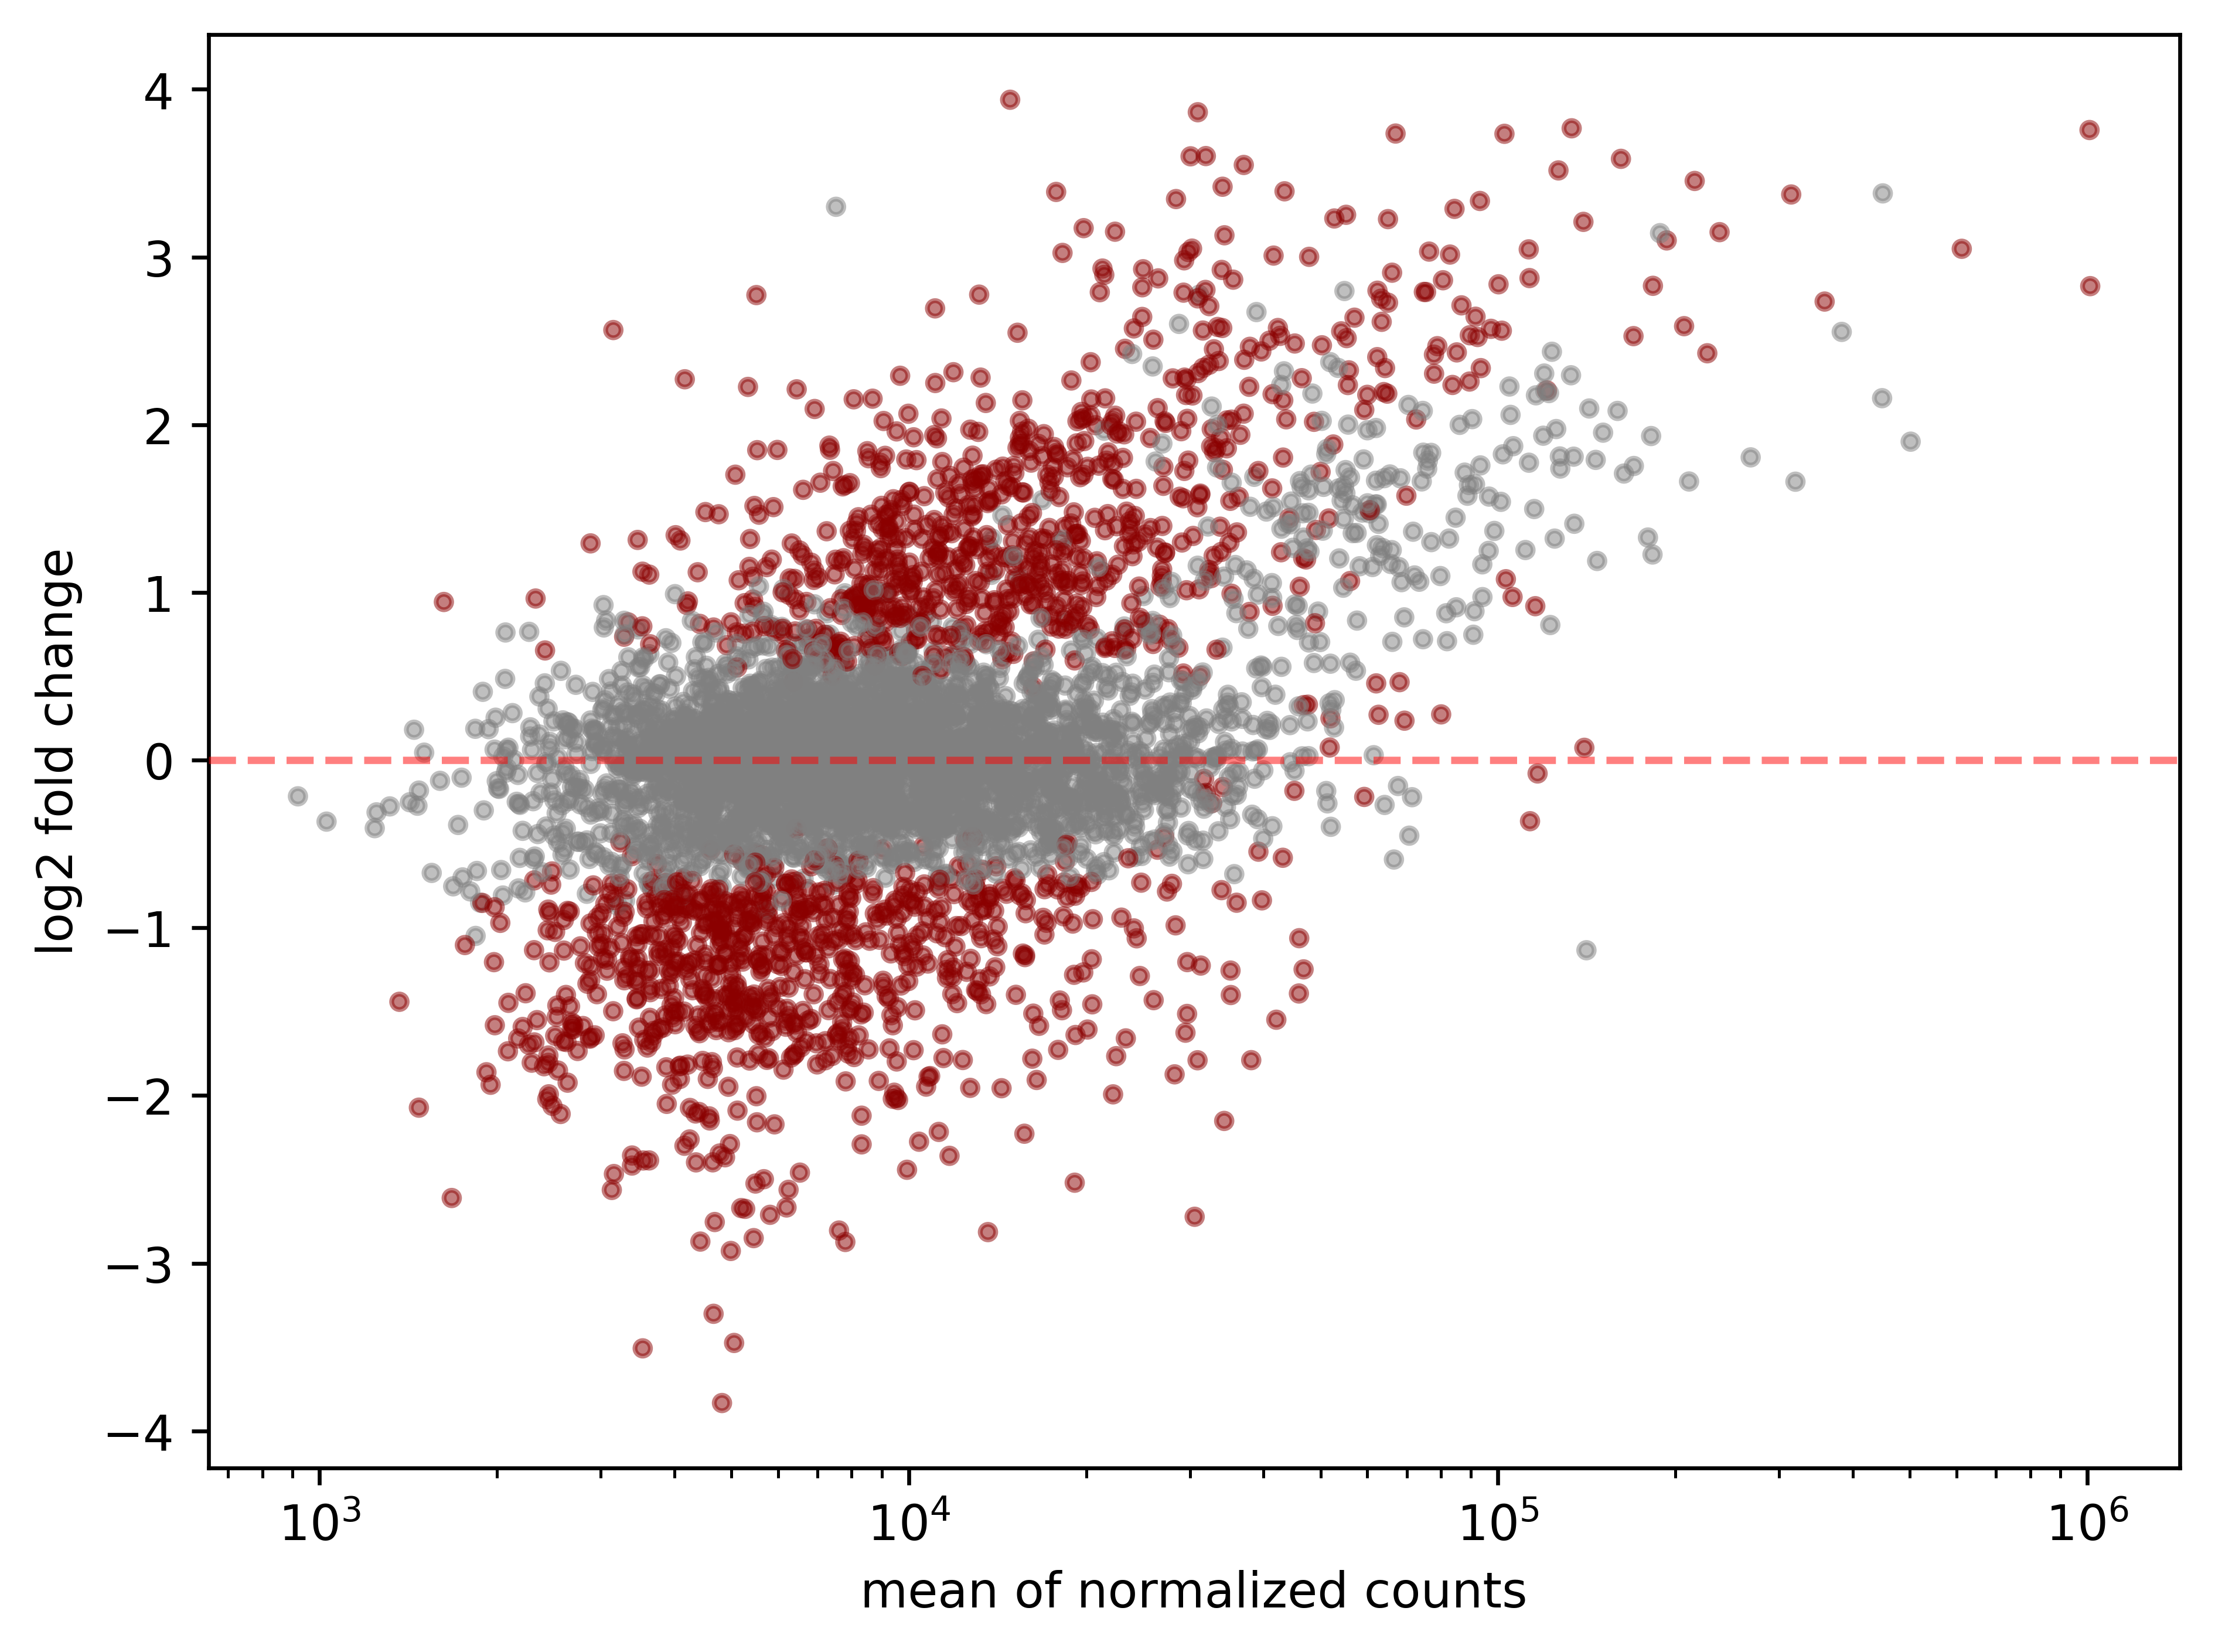

In [55]:
stat_res.plot_MA(s=10)

In [57]:
#Save results
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/simulations/results/replicates_pydeseq_5000/cn_naive/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "2_res_CNnaive_10_5000.csv"))